# IronKaggle

## 1. Importing libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('../data/sales.csv')
sales.head(1)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,18/04/2013,517,1,0,0,0,4422


## 2. Data wrangling.

### 2.1 Cleaning the data.

In [3]:
# We will remove the index. It is not necesary to calculete the model.
sales = sales.drop(['Unnamed: 0'],axis=1)

# To make date to numeric.
sales['date'] = pd.DatetimeIndex(sales['date']) 
sales['date'] = pd.to_numeric(sales['date'], errors='coerce')

# To make satate holiday numeric
sales['state_holiday'] = sales['state_holiday'].map({'0':0,'a': 1, 'b': 1,'c':1})

/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '18/04/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '29/08/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '28/05/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '19/03/2013' in DD/MM/YYYY format. Prov

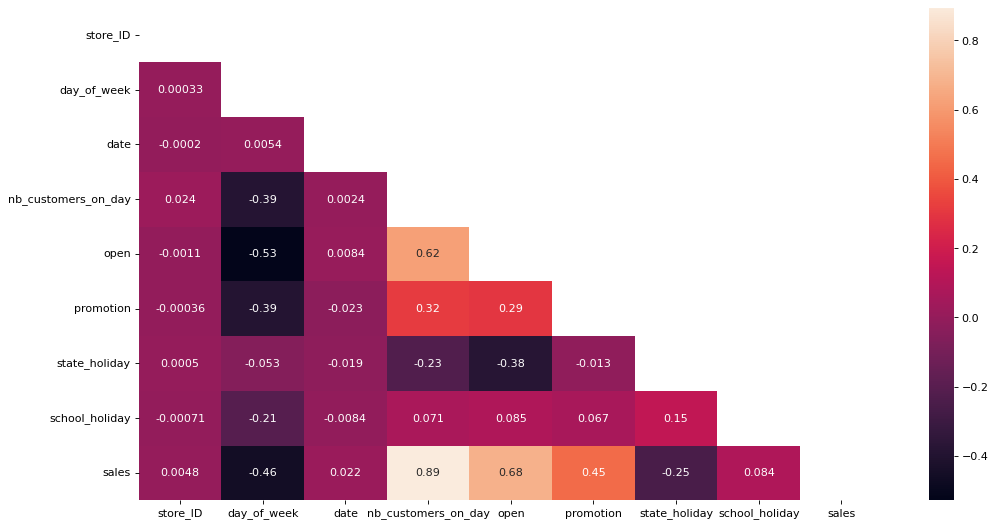

In [4]:
# Correlation matrix
correlations_matrix = sales.corr()

# creating mask
mask = np.triu(np.ones_like(correlations_matrix))

plt.figure(figsize=(15,8), dpi=80) 
sns.heatmap(correlations_matrix, annot=True, mask=mask)
plt.show()

### 2.2 Spliting the target and the features.

In [5]:
y = sales['sales']
X = sales.drop(['sales'], axis = 1)

In [6]:
# Creating the train and the test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3 Prediction models.

### 3.1 Diferent models.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(max_depth = None,
                                criterion = 'mse',
                                min_samples_split = 10,
                                min_samples_leaf = 10)

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()


model_pipeline = [model1, model2]

train_score = []
test_score = []
cross_scores = []
mse = []
rmse = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    cross_scores.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))
    mse_calculated = mean_squared_error(y_test,model.predict(X_test))
    mse.append(mse_calculated)
    rmse.append(math.sqrt(mse_calculated))

/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Use

In [10]:
summary = {'Train Score':train_score,
           'Test Score':test_score,
           'Cross Score':cross_scores,
            'mse':mse,
          'rmse':rmse,}
summary = pd.DataFrame(summary).T
summary.columns = 'DecisionTree', 'LinearRegression'

In [11]:
summary

,DecisionTree,LinearRegression
Train Score,9.494470e-01,8.015367e-01
Test Score,9.174034e-01,8.012867e-01
Cross Score,9.147765e-01,8.015017e-01
mse,1.221994e+06,2.939909e+06
rmse,1.105438e+03,1.714616e+03


### 3.2 Parameters optimitation.

In [12]:
from sklearn.model_selection import RandomizedSearchCV


max_depth_choices= [3,10,None]
criterion_choices = ['mse']
min_samples_split_choices = [2,10]
min_samples_leaf_choices = [2,10]   

random_grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [13]:
# Parameters optimitation for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = random_grid, cv = 5)
grid_search.fit(X_train, y_train)

/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Use

/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Use

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [14]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

## 4. Predicting results.

### 4.1 Importing and data wranglin with the new file.

In [15]:
sales_validation = pd.read_csv('../data/validation_for students.csv')

In [16]:
sales_validation.head(3)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0


In [17]:
# We will remove the index. It is not necesary to calculate the model.
X = sales_validation.drop(['index'],axis=1)

In [18]:
X['date'] = list(map(lambda x: x.replace('/','-'),X['date']))

In [19]:
# To make date to numeric.
X['date'] = pd.DatetimeIndex(X['date']) 
X['date'] = pd.to_numeric(X['date'], errors='coerce')

/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '29-12-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '19-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '29-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
/Users/vascoreis/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/datetimes.py:327: UserWarning: Parsing '26-06-2014' in DD/MM/YYYY format. Prov

In [20]:
# To make satate holiday numeric
X['state_holiday'] = X['state_holiday'].map({'0':0,'a': 1, 'b': 1,'c':1})

In [21]:
#DecisionTreeRegressor
predicted_sales1 = pd.Series(model1.predict(X),name='predicted_sales')

In [22]:
#LinearRegression
predicted_sales2 = pd.Series(model2.predict(X),name='predicted_sales')

### 4.2 Predicting the sales.

In [23]:
resultsTree = pd.concat([sales_validation, predicted_sales1],axis=1)
final_resultsTree = resultsTree[['index','predicted_sales']].sort_values('index')

In [24]:
resultsLM = pd.concat([sales_validation, predicted_sales2],axis=1)
final_resultsLM = resultsLM[['index','predicted_sales']].sort_values('index')

## 5. Exporting the files.

In [31]:
final_resultsTree.to_excel('../predictions/Tree_predictions.xlsx',index = False)

In [32]:
final_resultsLM.to_excel('../predictions/LM_predictions.xlsx',index = False)

## 6. Saving model in pickle file

In [29]:
import pickle

In [33]:
#creates pickle file for the model DecisionTreeRegressor
pickle.dump(model1, open('../model/model_DTR.pkl','wb'))

#creates pickle file for the model LinearRegression
pickle.dump(model1, open('../model/model_LR.pkl','wb'))